# ^-^ Hello-WeenR ^-^

let's import all the things we need and get started

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from scipy.stats import shapiro, probplot, f_oneway
from IPython.display import display, Markdown
from IPython.core.pylabtools import figsize

sns.set(font_scale=1.2)
figsize(12, 6)
graph.style.use('fivethirtyeight')

# Exploratory Data Analysis

Let's explore the data to see what kind fo interesting questions we can ask

In [2]:
candy_sales = pd.read_csv('https://raw.githubusercontent.com/cjlortie/halloweenR/gh-pages/data/canada/canadian.candy.sales.csv')
children = pd.read_csv('https://raw.githubusercontent.com/cjlortie/halloweenR/gh-pages/data/canada/canadian.children.csv')
sugar = pd.read_csv('https://raw.githubusercontent.com/cjlortie/halloweenR/gh-pages/data/canada/canadian.sugar.csv')
health = pd.read_csv('https://raw.githubusercontent.com/cjlortie/halloweenR/gh-pages/data/canada/canadian.youth.health.csv')

# Clean data
children['children.5.to.14'] = children['children.5.to.14'].str.replace(',', '').astype(int)
children.columns = ['year', 'children']

candy_sales.drop('day', axis='columns', inplace=True)
candy_sales.columns = ['month', 'year', 'sales']

# Let's see the end result
display(candy_sales.head())
display(children.head())
display(sugar.head())
display(health.head())

,month,year,sales
0,1,1997,101014
1,2,1997,101938
2,3,1997,136057
3,4,1997,105601
4,5,1997,119123


,year,children
0,1985,3656755
1,1986,3644483
2,1987,3668322
3,1988,3706408
4,1989,3759792


,Geography,Food categories,Commodity (kilograms per person per year),2011,2012,2013,2014,2015
0,Canada,Food available,Sugar refined,30.15,28.9,30.34,30.04,29.24
1,Canada,Food available,Sugar Content,30.15,28.9,30.34,30.04,29.24


,year,Perceived health very good or excellent,Perceived health fair or poor,Diabetes,Physical activity during leisure-time moderately active or active,Physical activity during leisure-time inactive,Body mass index 12 to 17 years old overweight,Functional health good to full,Injuries in the past 12 months causing limitation of normal activities
0,2003,2220569,163682,11262,2318597,901526,NaN,NaN,780849
1,2005,2260599,154639,9627,2334930,947631,454905.0,NaN,805521
2,2007,2315378,162686,15920,2290810,957935,419617.0,NaN,NaN
3,2008,2327341,166523,9907,2261565,1007581,423996.0,NaN,
4,2009,2293668,140510,,2327844,950071,449945.0,2832755,891262


Those data frames looks good but I don't have that much time. There let's go for the low hanging fruit and try to predict candy sales! 

First let's see what our data looks like.

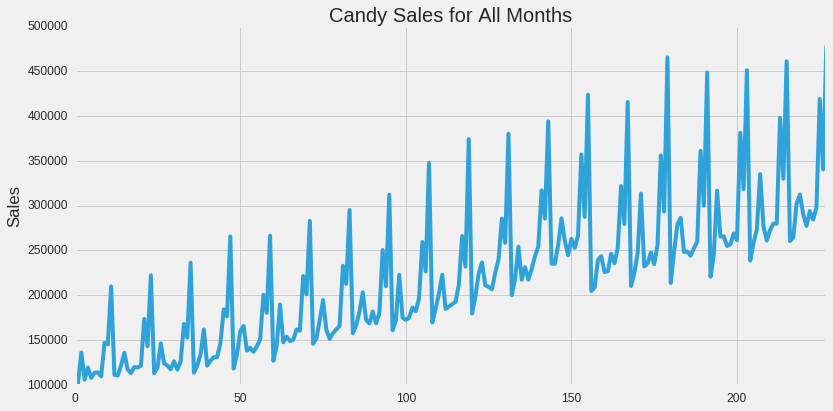

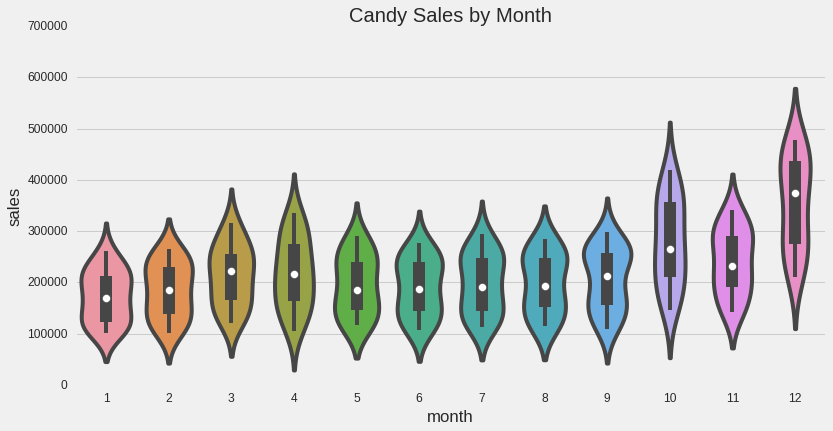

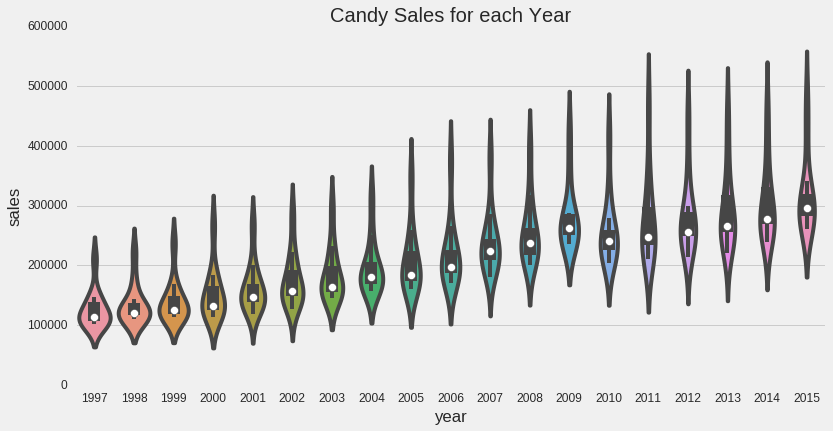

In [3]:
# Candy Sales Data
candy_sales['sales'].plot()
graph.title('Candy Sales for All Months')
graph.ylabel('Sales')
graph.show()

sns.violinplot(x=candy_sales['month'], y=candy_sales['sales'])
graph.title('Candy Sales by Month')
graph.show()

sns.violinplot(x=candy_sales['year'], y=candy_sales['sales'])
graph.title('Candy Sales for each Year')
graph.show()

Points worth noting in my opinion
- Candy sales for all month graphs shows an interesting, cyclical, yearly trend
- The monthly data appears to show that October and December has the most sales on average
- The first and last graphs appears to show that candy sales have been increasing year over year 

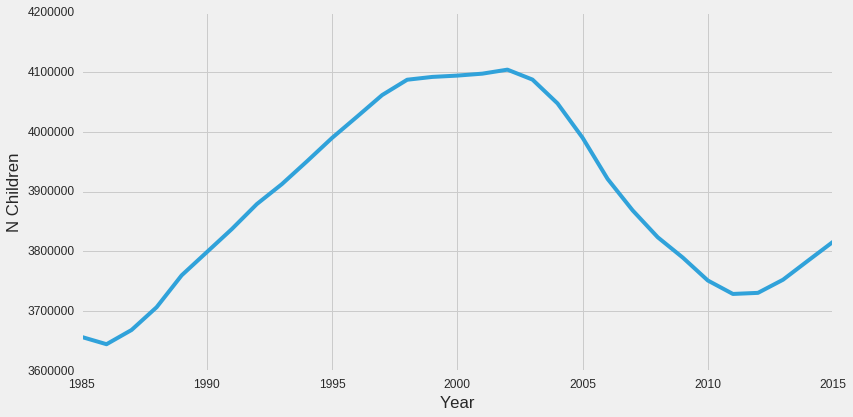

In [4]:
# Children Data
graph.plot(children['year'], children['children'])
graph.ylabel('N Children')
graph.xlabel('Year')
graph.show()

**THE NUMBER OF CHILDREN IN CANADA LOOKS LIKE THAT!?** That's pretty cool, pretty sweet, pretty hip-hop. I'm starting to have a feeling that this will not be well correlated with candy sales. It might just be mostly adults. 

Either way let's make a _predictive model_ that will predict the amount of candy sales given number of children, month and year.

We're going to need to combine all the data we need and then make a train test split to ensure that whatever we learn can be generalised.

N = 228


,month,year,sales,children
0,1,1997,101014,4061377
1,2,1997,101938,4061377
2,3,1997,136057,4061377
3,4,1997,105601,4061377
4,5,1997,119123,4061377


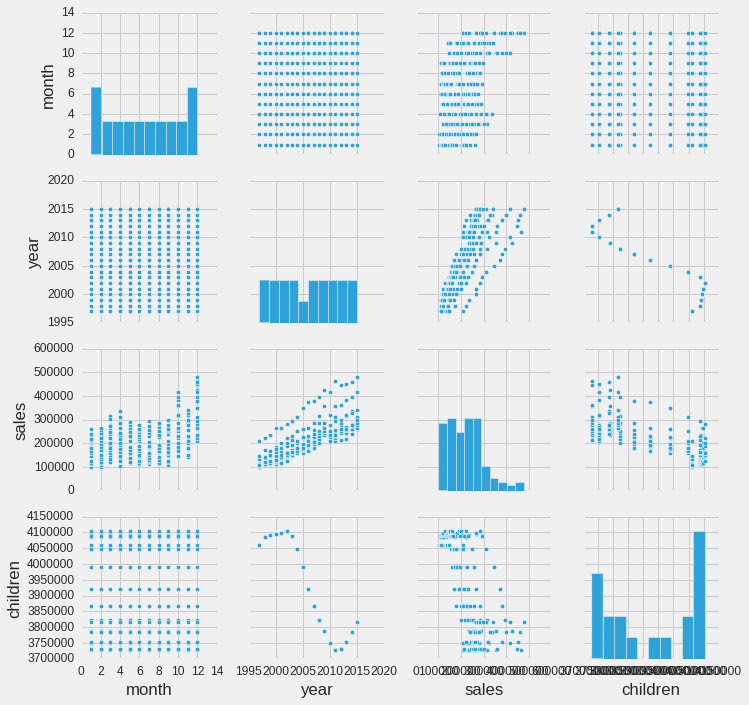

In [5]:
# Merging the candy sales data and the children data to see what's what.
candy_children_df = pd.merge(candy_sales, children, on='year')
print('N =', len(candy_children_df))
display(candy_children_df.head())

# Let's make a pair plot to see what if any correlations we can expect
sns.pairplot(candy_children_df)
graph.show()

Sales appears to correlate with everything in a relatively simple way but so do the other variables so we'll be looking out for multicolinearity for sure.

# Let the Tests Begin!!!

Let's check for monthly normality and yearly normalilty with a $\alpha = 0.01$ because of how many tests we are about to run.

month = 1 do not reject
month = 2 do not reject
month = 3 do not reject
month = 4 do not reject
month = 5 do not reject
month = 6 do not reject
month = 7 do not reject
month = 8 do not reject
month = 9 do not reject
month = 10 do not reject
month = 11 do not reject
month = 12 do not reject
REJECT! year = 1997 p:0.003167171962559223 Data is not Normal


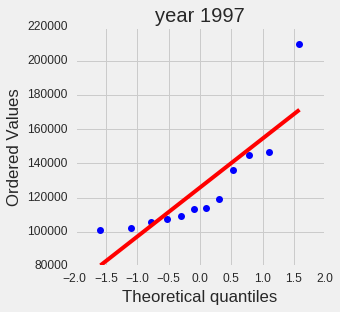

REJECT! year = 1998 p:0.0010694083757698536 Data is not Normal


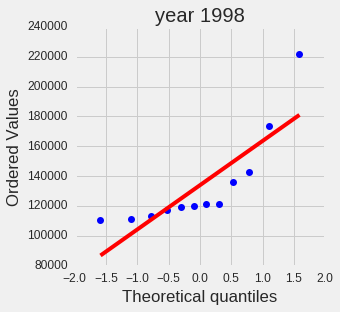

REJECT! year = 1999 p:0.0010224354919046164 Data is not Normal


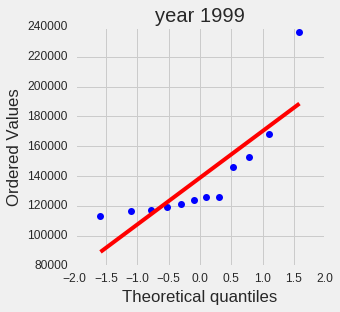

REJECT! year = 2000 p:0.004962586332112551 Data is not Normal


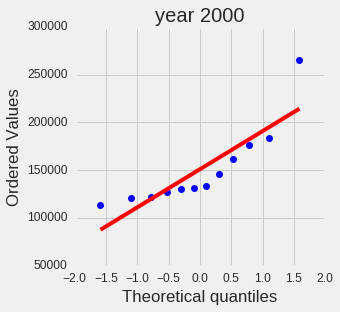

year = 2001 do not reject
year = 2002 do not reject
REJECT! year = 2003 p:0.0074300640262663364 Data is not Normal


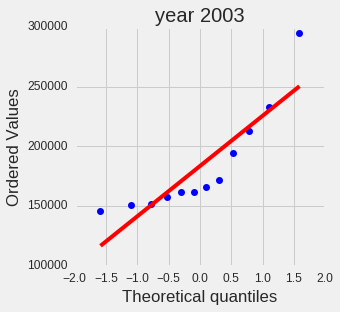

REJECT! year = 2004 p:0.003484813729301095 Data is not Normal


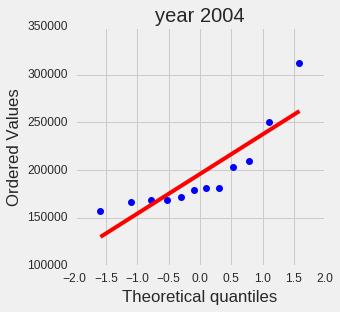

REJECT! year = 2005 p:0.0038642147555947304 Data is not Normal


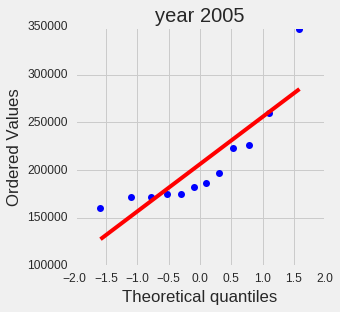

REJECT! year = 2006 p:0.001726073562167585 Data is not Normal


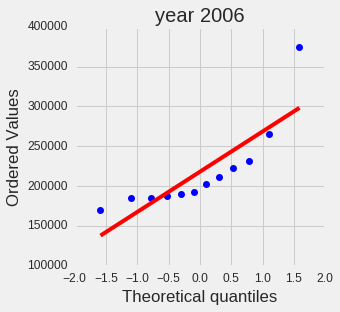

year = 2007 do not reject
year = 2008 do not reject
REJECT! year = 2009 p:0.0028075433801859617 Data is not Normal


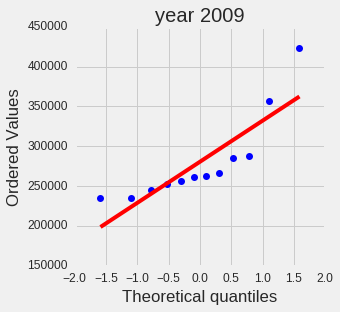

REJECT! year = 2010 p:0.004518285859376192 Data is not Normal


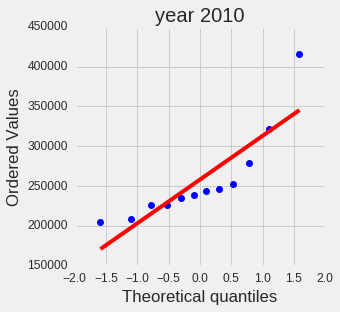

REJECT! year = 2011 p:0.006054976489394903 Data is not Normal


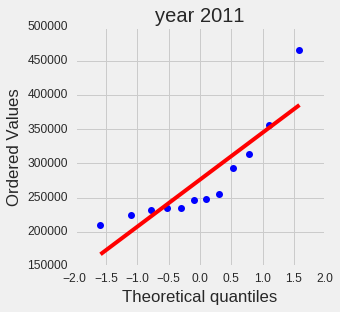

REJECT! year = 2012 p:0.006845783907920122 Data is not Normal


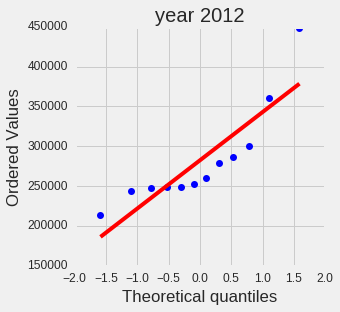

year = 2013 do not reject
year = 2014 do not reject
REJECT! year = 2015 p:0.004439815878868103 Data is not Normal


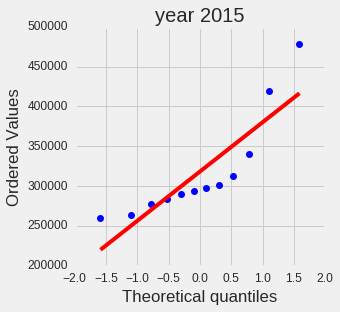

In [6]:
# LET THE NORMALITY TESTS BEGIN!!

def run_normality_tests(col, where):
    alpha = 0.01
    subset = candy_children_df[candy_children_df[col] == where]['sales'].values
    
    # Sharpiro Wilk Normality Test by Month
    _, p = shapiro(subset)
    
    # QQ-Plot
    if p > alpha:
        print('{} = {} do not reject'.format(col, where))
    else:
        print('REJECT! {} = {} p:{} Data is not Normal'.format(col, where, p))
        graph.figure(figsize=(4, 4))
        probplot(subset, plot=graph)
        graph.title('{} {}'.format(col, where))
        graph.show()

# Run Test
for month in candy_children_df['month'].unique():
    run_normality_tests('month', month)
    
for year in candy_children_df['year'].unique():
    run_normality_tests('year', year)

All the by sales by month tests were normally distributed and the few years of sales by year test that weren't normally distributed shouldn't be a problem with an ANOVA since they are really robust to things like these.


# Let's Make a Model Now

We'll make an ANOVA that compares all the months and see which are significantly different if any while controlling for year.

In [7]:
# Just a Reminder
print(candy_children_df.columns)

Index(['month', 'year', 'sales', 'children'], dtype='object')


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# First let's just do a simple 1 way ANOVA and see what it says
simple_ols_model = ols('sales ~ month + C(year)', data=candy_children_df).fit()

# ANOVA Results
display(Markdown('### ANOVA Results'))
display(sm.stats.anova_lm(simple_ols_model))

# OLS Results with automatic warning detection
display(Markdown('### OLS Regression Results'))
print(simple_ols_model.summary())

### ANOVA Results

,df,sum_sq,mean_sq,F,PR(>F)
C(year),18.0,8.536052e+11,4.742251e+10,33.008238,4.809102e-51
month,1.0,2.842920e+11,2.842920e+11,197.880268,5.028493e-32
Residual,208.0,2.988309e+11,1.436687e+09,NaN,NaN


### OLS Regression Results

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     41.69
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.87e-60
Time:                        17:25:58   Log-Likelihood:                -2716.8
No. Observations:                 228   AIC:                             5474.
Df Residuals:                     208   BIC:                             5542.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        5.935e+04   1.19e+04     

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# First let's just do a simple 1 way ANOVA and see what it says
simple_ols_model = ols('sales ~ C(month) + year', data=candy_children_df).fit()

# ANOVA Results
display(Markdown('### ANOVA Results'))
display(sm.stats.anova_lm(simple_ols_model))

# OLS Results with automatic warning detection
display(Markdown('### OLS Regression Results'))
print(simple_ols_model.summary())

### ANOVA Results

,df,sum_sq,mean_sq,F,PR(>F)
C(month),11.0,5.339355e+11,4.853959e+10,165.915673,1.608542e-98
year,1.0,8.398932e+11,8.398932e+11,2870.882151,2.396646e-126
Residual,215.0,6.289949e+10,2.925558e+08,NaN,NaN


### OLS Regression Results

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     391.3
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          9.51e-139
Time:                        17:40:18   Log-Likelihood:                -2539.2
No. Observations:                 228   AIC:                             5104.
Df Residuals:                     215   BIC:                             5149.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -2.206e+07   4.15e+05    -53.

I see you Mr. Multicollinearity but I assume we aren't supposed to a MANCOVA so I'll pretend I didn't see it for now. Oh look at that R<sup>2</sup><sub>adjusted</sub> value over there, **0.955**! That's some ridiculous stuff!

# Predictive Model

Can we make one? Let's see.

Made with love by _Stephen Anthony Rose_